Installing Yahoo Finance api to get data.

In [60]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


A kernel restart required after installation, and re-run the code then start Importing important libraries.

In [61]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

historical daily data via Yahoo Finance for the period from 1 March 2020 to 1 March 2021.

In [62]:
dd = yf.download("^GSPC", start="2020-02-01", end="2021-02-01")

[*********************100%***********************]  1 of 1 completed


Check downloaded data.

In [63]:
dd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03,3235.659912,3268.439941,3235.659912,3248.919922,3248.919922,3757910000
2020-02-04,3280.610107,3306.919922,3280.610107,3297.590088,3297.590088,3995320000
2020-02-05,3324.909912,3337.580078,3313.750000,3334.689941,3334.689941,4117730000
2020-02-06,3344.919922,3347.959961,3334.389893,3345.780029,3345.780029,3868370000
2020-02-07,3335.540039,3341.419922,3322.120117,3327.709961,3327.709961,3730650000


In [64]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-02-03 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Plot the movement (shape) of the stock (Close/Adj Close price)

<AxesSubplot:xlabel='Date'>

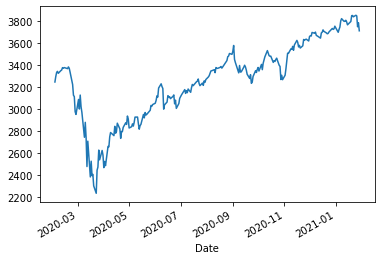

In [65]:
dd['Adj Close'].plot()

calculate its annualised volatility using 12M and 6M historical data.

In [66]:
dd['Adj Close'].describe()

count     251.000000
mean     3256.400359
std       355.264975
min      2237.399902
25%      3032.929932
50%      3319.469971
75%      3504.160034
max      3855.360107
Name: Adj Close, dtype: float64

In [67]:
rets = np.log(dd / dd.shift(1))
rets.head().round(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.0138,0.0117,0.0138,0.0149,0.0149,0.0613
2020-02-05,0.0134,0.0092,0.0101,0.0112,0.0112,0.0302
2020-02-06,0.0060,0.0031,0.0062,0.0033,0.0033,-0.0625
2020-02-07,-0.0028,-0.0020,-0.0037,-0.0054,-0.0054,-0.0363


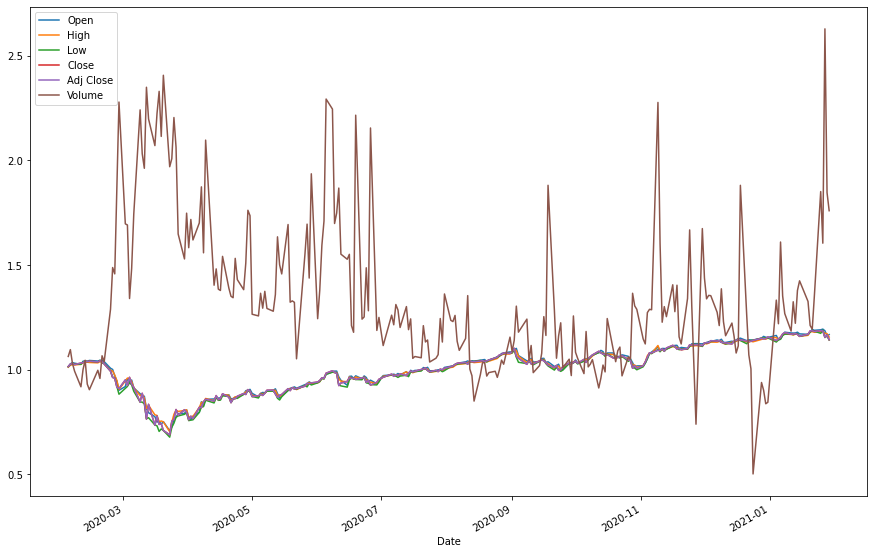

In [68]:
rets.cumsum().apply(np.exp).plot(figsize=(15, 10));

In [69]:
dx = pd.DataFrame(dd['Close']).dropna()
dx.tail()

,Close
Date,
2021-01-25,3855.360107
2021-01-26,3849.620117
2021-01-27,3750.770020
2021-01-28,3787.379883
2021-01-29,3714.239990


In [70]:
window = 10
dx['min'] = dd['Close'].rolling(window=window).min()
dx['mean'] = dd['Close'].rolling(window=window).mean()
dx['std'] = dd['Close'].rolling(window=window).std()
dx['median'] = dd['Close'].rolling(window=window).median()
dx['max'] = dd['Close'].rolling(window=window).max()
dx['ewma'] = dd['Close'].ewm(halflife=0.5, min_periods=window).mean()
dx.dropna().head()

,Close,min,mean,std,median,max,ewma
Date,,,,,,,
2020-02-14,3380.159912,3248.919922,3339.807983,40.945401,3348.935059,3380.159912,3378.567422
2020-02-18,3370.290039,3297.590088,3351.944995,26.424269,3354.920044,3380.159912,3372.359383
2020-02-19,3386.149902,3327.709961,3360.800977,20.318065,3364.020020,3386.149902,3382.702273
2020-02-20,3373.229980,3327.709961,3364.654980,18.377445,3371.760010,3386.149902,3375.598054
2020-02-21,3337.750000,3327.709961,3363.851978,19.438622,3371.760010,3386.149902,3347.212013


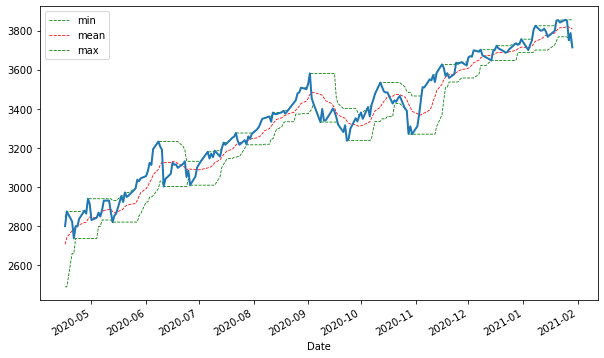

In [71]:
ax = dx[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
dd['Close'].iloc[-200:].plot(ax=ax, lw=2.0);

In [73]:
dl = np.log(dd / dd.shift(1))
dl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.013797,0.011704,0.013797,0.014869,0.014869,0.061261
2020-02-05,0.013413,0.009229,0.010051,0.011188,0.011188,0.030178
2020-02-06,0.006000,0.003105,0.006209,0.003320,0.003320,-0.062469
2020-02-07,-0.002808,-0.001955,-0.003687,-0.005415,-0.005415,-0.036251


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

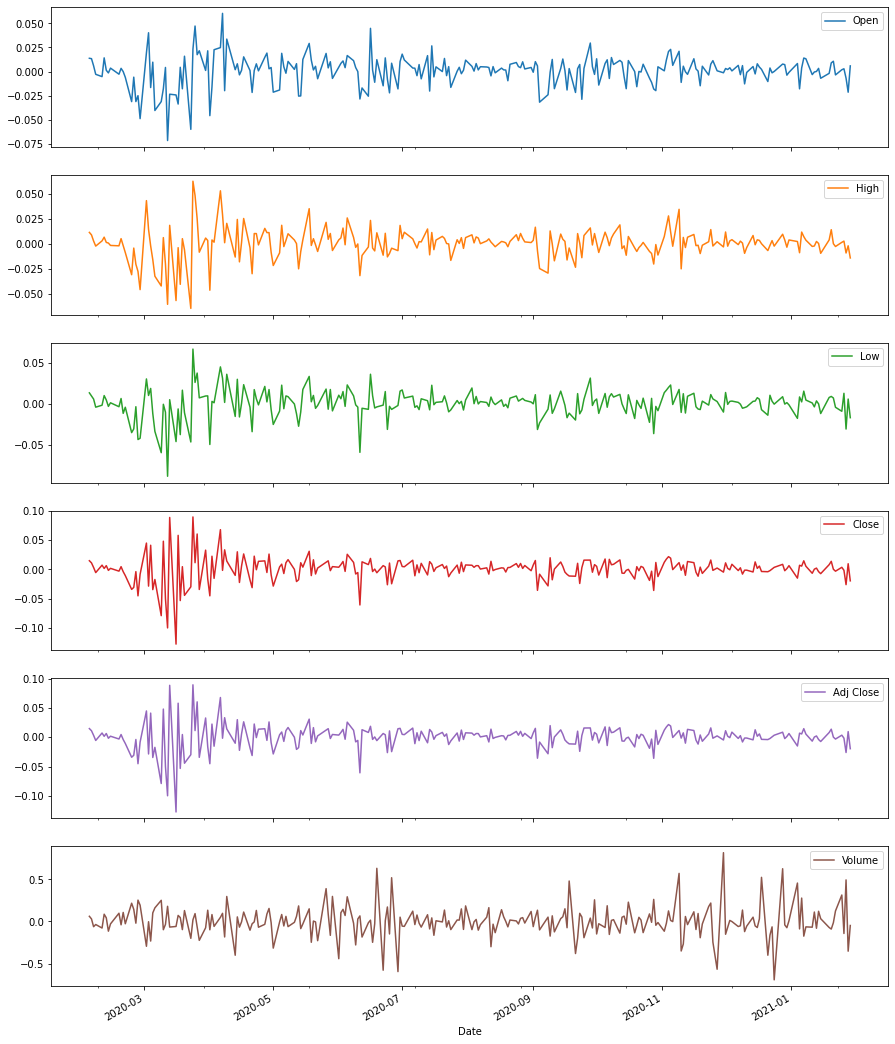

In [77]:
dl.dropna(inplace=True)
dl.plot(subplots=True, figsize=(15, 20))

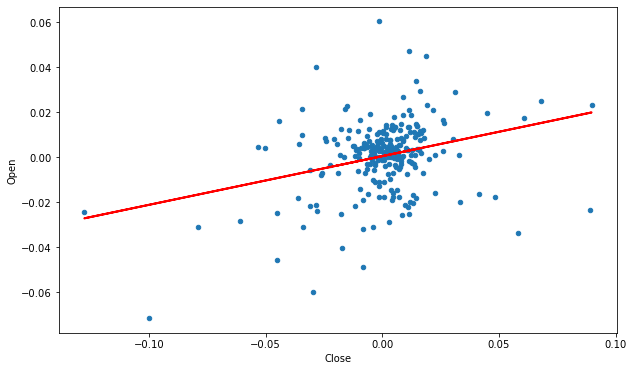

In [79]:
reg = np.polyfit(dl['Close'], dl['Open'], deg=1)
ax = sprets.plot(kind='scatter', x='Close', y='Open', figsize=(10, 6))
ax.plot(dl['Close'], np.polyval(reg, dl['Close']), 'r', lw=2);

array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Adj Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Adj Close', ylabel='High'>,
        <AxesSubplot:xlabel='Volume', ylabel='High'>],
       [<AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Adj Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Volume', ylabel='Low'>],
       [<AxesSubplot:xlabel='Open', ylabel='Cl

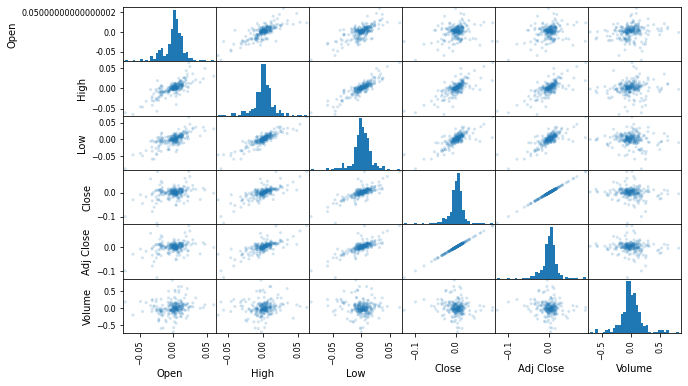

In [80]:
pd.plotting.scatter_matrix(dl, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))